# Logistic Regression

##### Problem - Predict if a person will buy an SUV based on their age and estimated salary

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Load dataset

In [2]:
data = pd.read_csv('./data/Suv_Purchase_Data.csv')
data.replace(np.inf, np.nan)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


#### 2. Extract Features - x(Age & Salary) & y(SUV Purchased Yes/No)

In [3]:
X = data.iloc[:, [2,3]].values

In [4]:
y = data.iloc[:, 4].values

#### 3.Visualize the data

C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


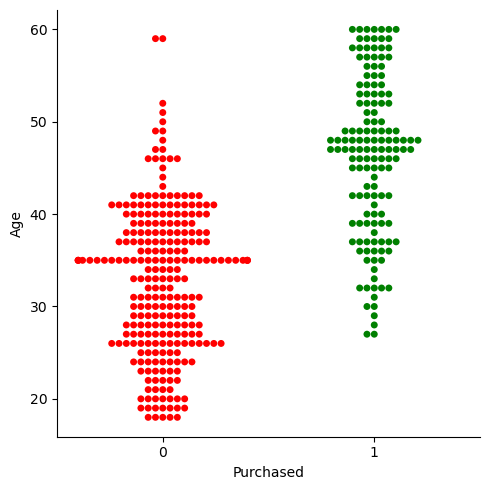

In [6]:
sns.catplot(data, x="Purchased", y="Age", kind='swarm', hue='Purchased', palette=['red', 'green'])

C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


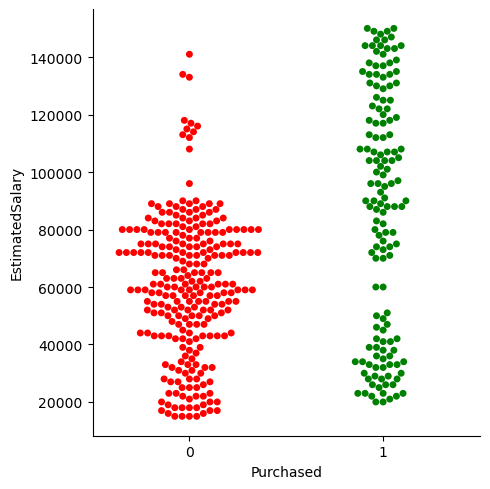

In [55]:
sns.catplot(data, x="Purchased", y="EstimatedSalary", kind='swarm', hue='Purchased', palette=['red', 'green'])

#### 4.Split training and test data

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

#### 5.Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

#### 6.Train the model

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

#### 7.Predict SUV Purchase

In [21]:
y_predict = model.predict(x_test)

In [22]:
y_predict

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0], dtype=int64)

#### 7.Visualize result

C:\Users\ranja\AppData\Local\Temp\ipykernel_19436\1831455014.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x=y_predict, y=x_test[:, 0], kind='swarm', palette=['red', 'green'])
C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


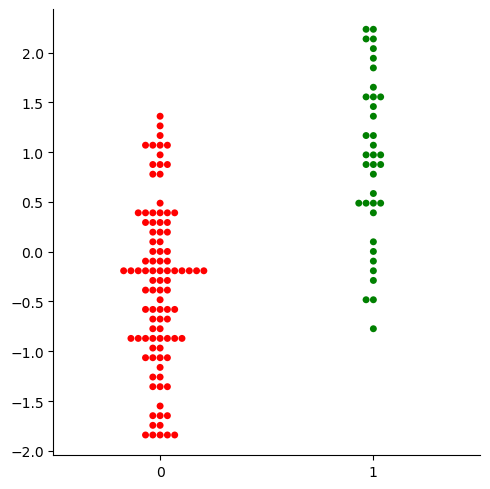

In [70]:
sns.catplot(x=y_predict, y=x_test[:, 0], kind='swarm', palette=['red', 'green'])

#### 8.Evaluate the model using Confusion metrix

In [93]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predict)
m = matrix.flatten()
matrix

array([[80,  6],
       [17, 31]], dtype=int64)

In [90]:
print('Total Data set:', sum(m))

Total Data set: 134


In [97]:
accuracy = int((m[0] + m[3]) / sum(m) * 100)
print(f'Predction Accuracy rate: {accuracy}%')

Predction Accuracy rate: 82%
